# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
# import pandas_datareader as pdr
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

BAC = yf.download("BAC", start=start, end=end)

C = yf.download("C", start=start, end=end)

GS = yf.download("GS", start=start, end=end)

JPM = yf.download("JPM", start=start, end=end)

MS = yf.download("MS", start=start, end=end)

WFC = yf.download("WFC", start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
WFC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,31.600000,31.975000,31.195000,31.900000,19.695122,11016400
2006-01-04,31.799999,31.820000,31.365000,31.530001,19.466679,10870000
2006-01-05,31.500000,31.555000,31.309999,31.495001,19.445070,10158000
2006-01-06,31.580000,31.775000,31.385000,31.680000,19.559284,8403800
2006-01-09,31.674999,31.825001,31.555000,31.674999,19.556200,5619600


In [4]:
for col in WFC.columns:
    print(col)

Open
High
Low
Close
Adj Close
Volume


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [4]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

bank_stocks.head()

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  32.956554  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  32.606556  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  32.648560  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  32.599556  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  32.620556  15619400   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   

                                                 WFC                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2006-01-03  58.310001  34.310364  5377000  31.600000  31.975000  31.195000   
2006-01-04  58.349998  34.333878  7977800  31.799999  31.820000  31.365000   
2006-01-05  58.509998  34.428040  5778000  31.500000  31.555000  31.309999   
2006-01-06  58.570000  34.463345  6889800  31.580000  31.775000  31.385000   
2006-01-09  59.189999  34.828163  4144500  31.674999  31.825001  31.555000   

                                            
                Close  Adj Close    Volume  
Date                                        
2006-01-03  31.900000  19.695118  11016400  
2006-01-04  31.530001  19.466684  10870000  
2006-01-05  31.495001  19.445066  10158000  
2006-01-06  31.680000  19.559288   8403800  
2006-01-09  31.674999  19.556204   5619600  

[5 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [5]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [6]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.956554  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.606556  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.648560  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.599556  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.620556  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  34.310364  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.333878  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.428040  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.463345  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.828163  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.695118  11016400  
2006-01-04   31.530001  19.466684  10870000  
2006-01-05   31.495001  19.445066  10158000  
2006-01-06   31.680000  19.559288   8403800  
2006-01-09   31.674999  19.556204   5619600  

[5 rows x 36 columns]

In [20]:
# answer from original notebook

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [7]:
max_close_prices = bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

print(max_close_prices)

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64


In [58]:
# answer from original notebook

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
returns = bank_stocks.copy()
returns = returns.reindex(index=bank_stocks.index, columns=bank_stocks.columns)

print(returns.head())

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.956554  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.606556  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.648560  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.599556  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.620556  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.50

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [11]:
returns = bank_stocks.copy()

for ticker in tickers:
    returns[ticker, 'Return'] = bank_stocks[ticker]['Close'].pct_change()

returns = returns.xs(key='Return', axis=1, level=1)

returns = returns.add_suffix(' Return')

print(returns.head())

Bank Ticker  BAC Return  C Return  GS Return  JPM Return  MS Return  \
Date                                                                  
2006-01-03          NaN       NaN        NaN         NaN        NaN   
2006-01-04    -0.010620 -0.018462  -0.013812   -0.014183   0.000686   
2006-01-05     0.001288  0.004961  -0.000393    0.003029   0.002742   
2006-01-06    -0.001501  0.000000   0.014169    0.007046   0.001025   
2006-01-09     0.000644 -0.004731   0.012030    0.016242   0.010586   

Bank Ticker  WFC Return  
Date                     
2006-01-03          NaN  
2006-01-04    -0.011599  
2006-01-05    -0.001110  
2006-01-06     0.005874  
2006-01-09    -0.000158  


In [65]:
# answer from original notebook

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

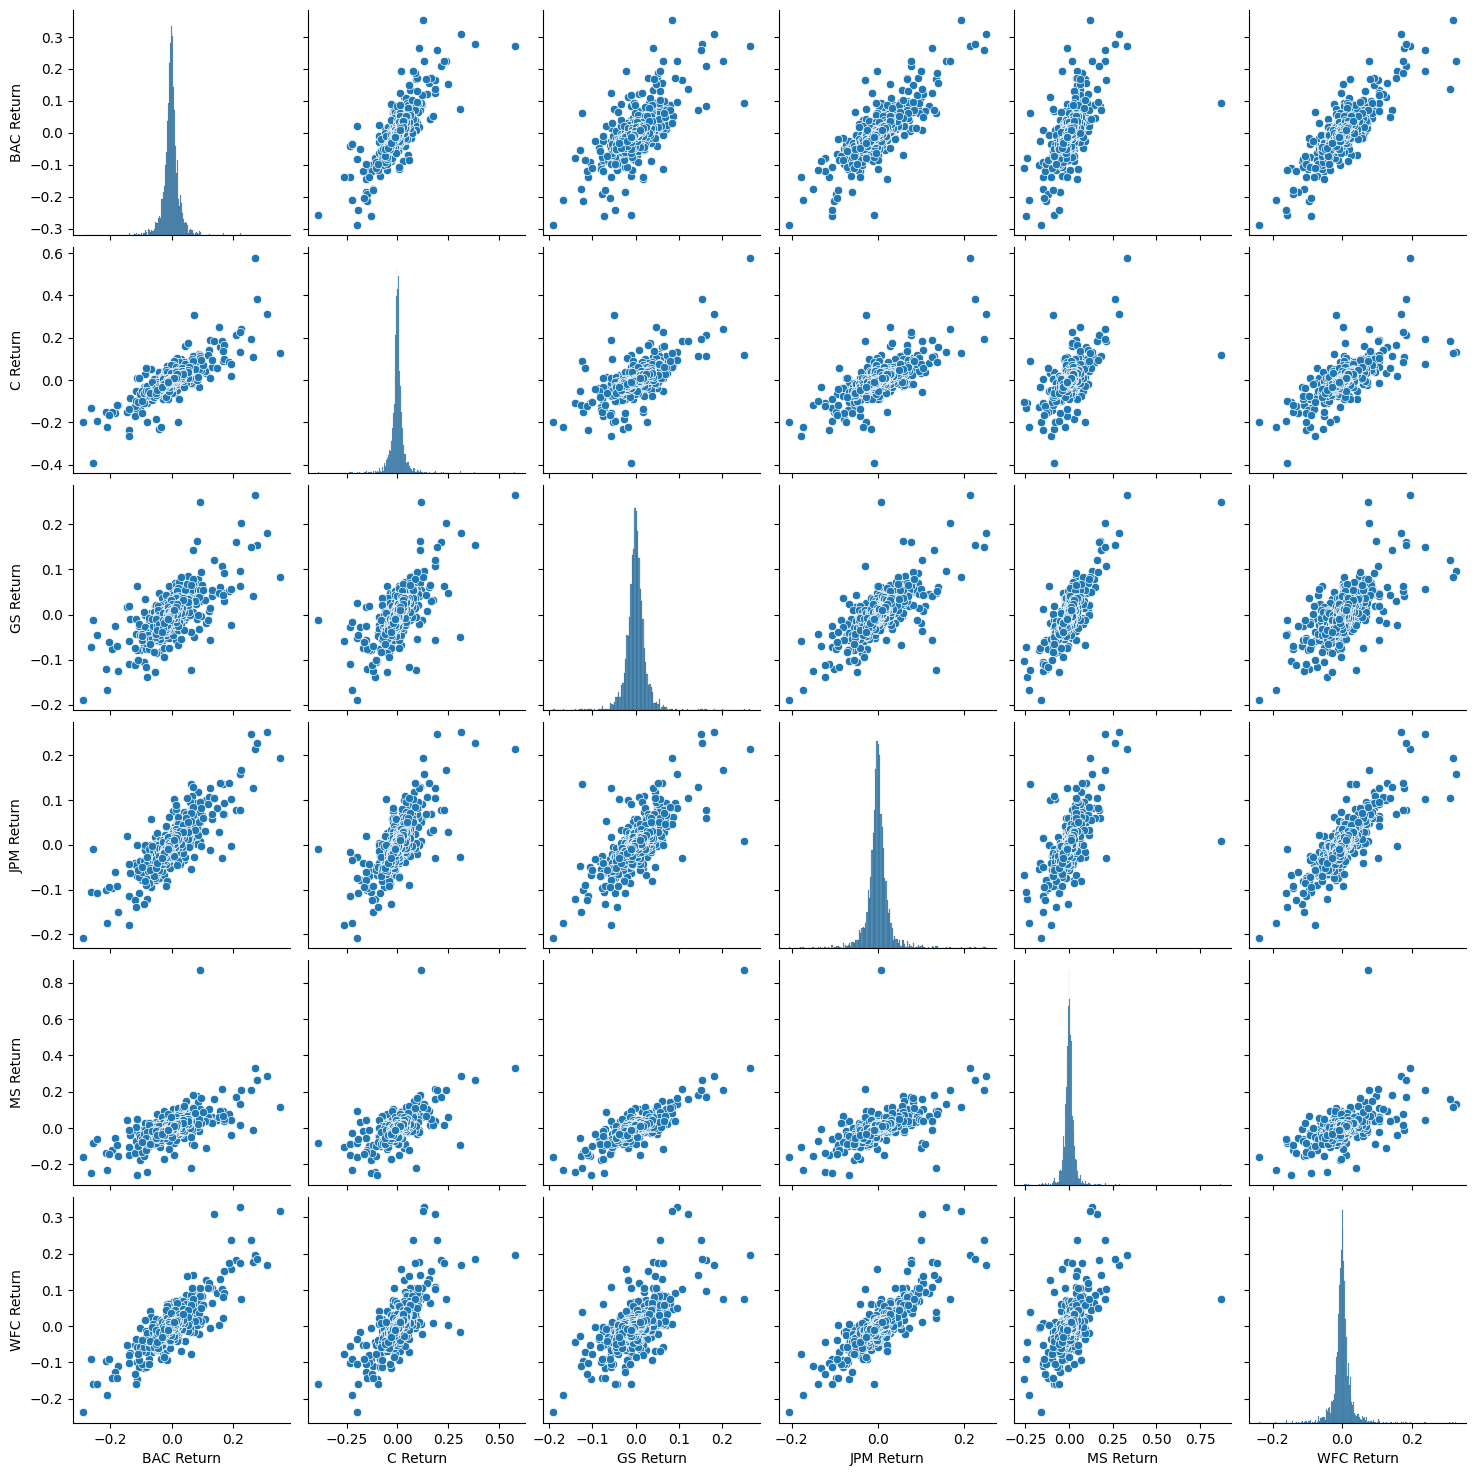

In [12]:
sns.pairplot(data=returns)

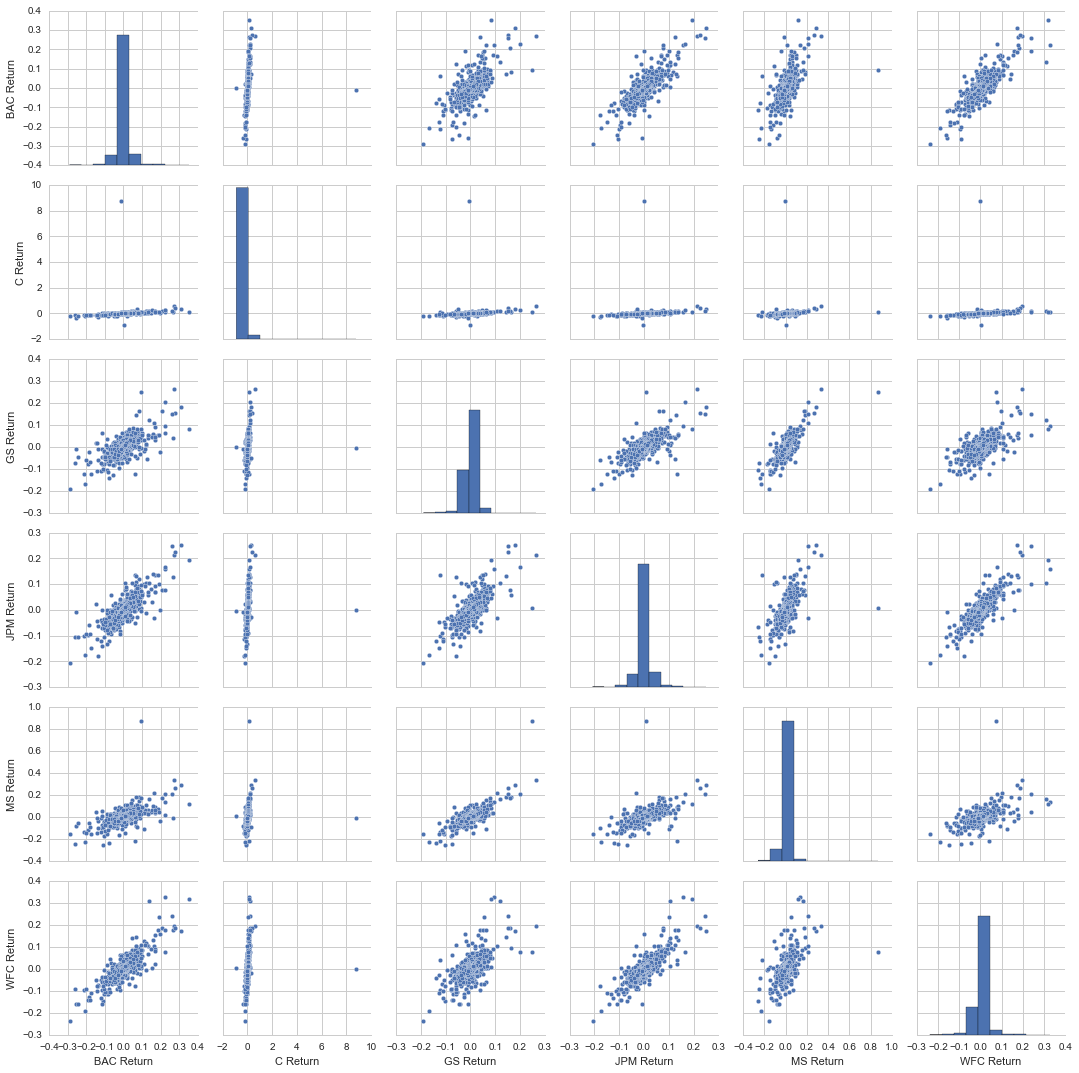

In [68]:
# answer from original notebook

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [12]:
best_returns = returns.idxmax()
worst_returns = returns.idxmin()

print('Best single day returns:')
print(best_returns)
print('\nWorst single day returns:')
print(worst_returns)

Best single day returns:
Bank Ticker
BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Worst single day returns:
Bank Ticker
BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]


In [75]:
# answer from original notebook

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [76]:
# answer from original notebook

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [13]:
std_returns = returns.std()

print('Standard deviations of returns:')
print(std_returns)

Standard deviations of returns:
Bank Ticker
BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64


In [81]:
# answer from original notebook

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [14]:
returns_2015 = returns.loc['2015-01-01':'2015-12-31']

std_returns_2015 = returns_2015.std()

print('\nStandard deviations of returns in 2015:')
print(std_returns_2015)


Standard deviations of returns in 2015:
Bank Ticker
BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64


In [88]:
# answer from original notebook

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

Text(13.819444444444445, 0.5, 'Frequency')

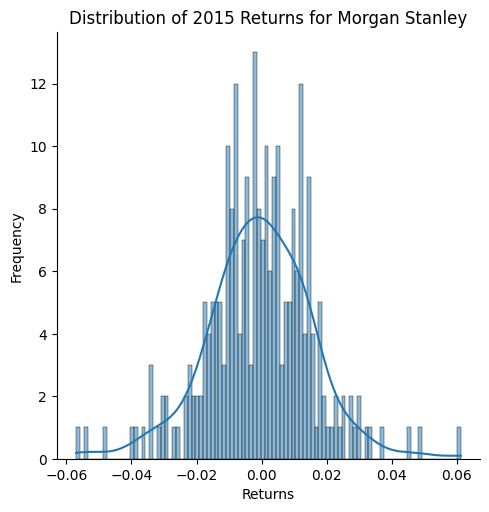

In [15]:
ms_returns_2015 = returns_2015['MS Return']

sns.displot(ms_returns_2015, bins=100, kde=True)

plt.title('Distribution of 2015 Returns for Morgan Stanley')
plt.xlabel('Returns')
plt.ylabel('Frequency')

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



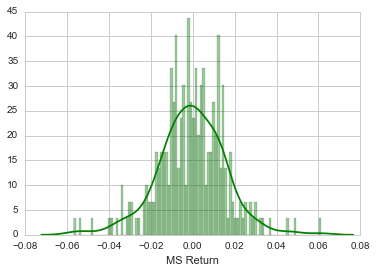

In [94]:
# answer from original notebook

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

Text(0.6944444444444446, 0.5, 'Frequency')

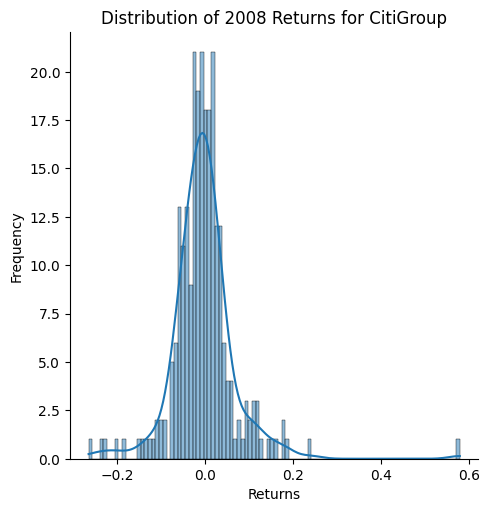

In [16]:
c_returns_2008 = returns.loc['2008-01-01':'2008-12-31']['C Return']

sns.displot(c_returns_2008, bins=100, kde=True)

plt.title('Distribution of 2008 Returns for CitiGroup')
plt.xlabel('Returns')
plt.ylabel('Frequency')

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



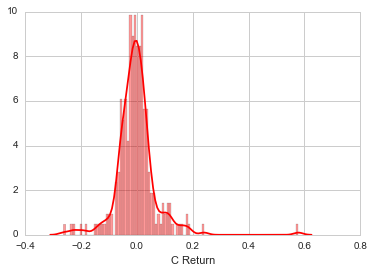

In [98]:
# answer from original notebook

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

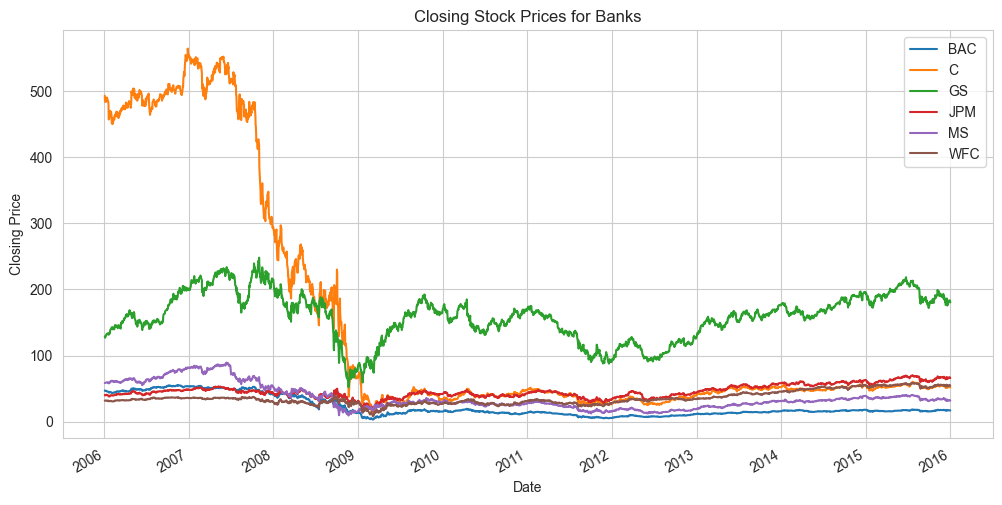

In [26]:
plt.figure(figsize=(12,6))

for ticker in tickers:
    bank_stocks[ticker]['Close'].plot(label=ticker)

plt.title('Closing Stock Prices for Banks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

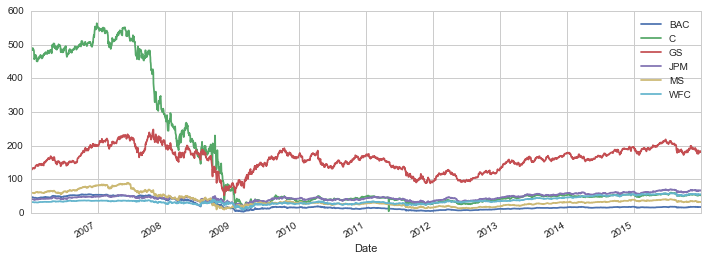

In [17]:
# answer from original notebook

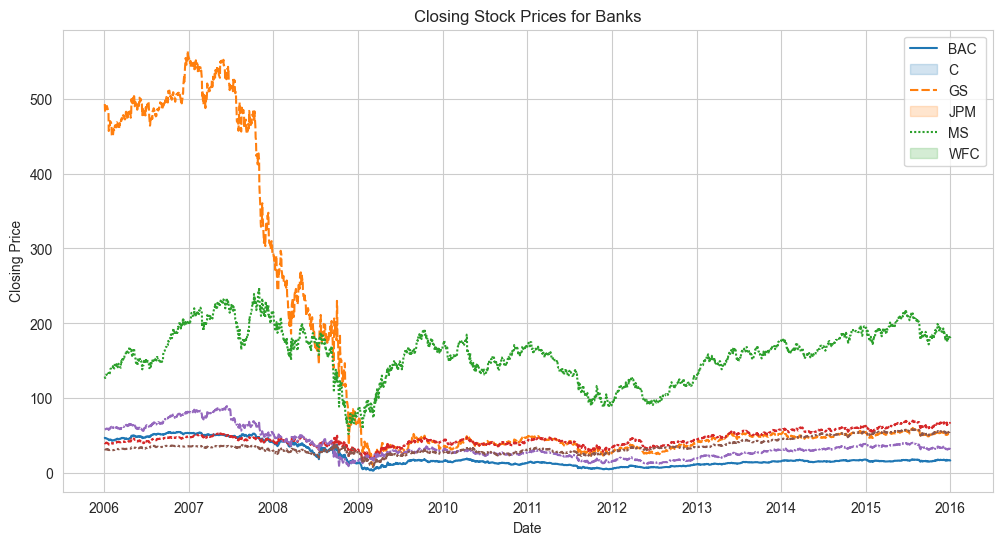

In [27]:
plt.figure(figsize=(12,6))

close_df = pd.DataFrame()
for ticker in tickers:
    close_df[ticker] = bank_stocks[ticker]['Close']

sns.lineplot(data=close_df)

plt.title('Closing Stock Prices for Banks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(tickers)

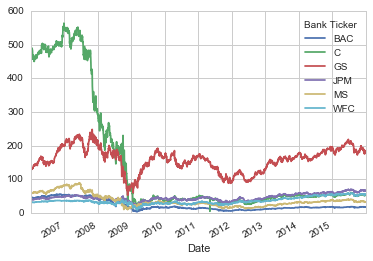

In [18]:
# answer from original notebook

In [18]:
import plotly.graph_objs as go

traces = []
for ticker in tickers:
    trace = go.Scatter(x=bank_stocks[ticker].index, y=bank_stocks[ticker]['Close'], name=ticker)
    traces.append(trace)

layout = go.Layout(title='Closing Stock Prices for Banks', xaxis=dict(title='Date'), yaxis=dict(title='Closing Price'))

fig = go.Figure(data=traces, layout=layout)

fig.show()

In [19]:
# answer from original notebook

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

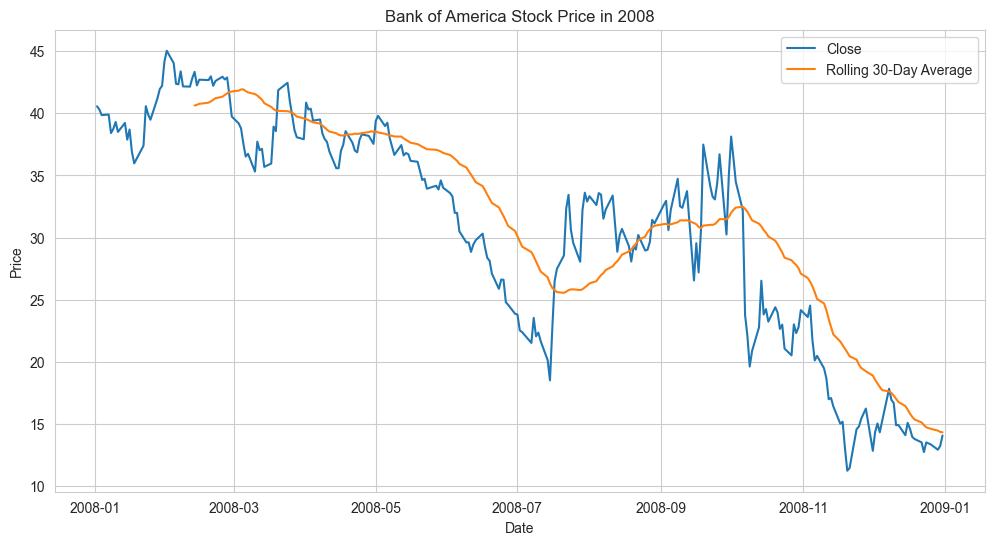

In [20]:
plt.figure(figsize=(12,6))

bac_2008 = bank_stocks['BAC'].loc['2008']

bac_rolling_30 = bac_2008['Close'].rolling(window=30).mean()

sns.set_style('whitegrid')
sns.lineplot(x=bac_2008.index, y=bac_2008['Close'], label='Close')
sns.lineplot(x=bac_rolling_30.index, y=bac_rolling_30, label='Rolling 30-Day Average')

plt.title('Bank of America Stock Price in 2008')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


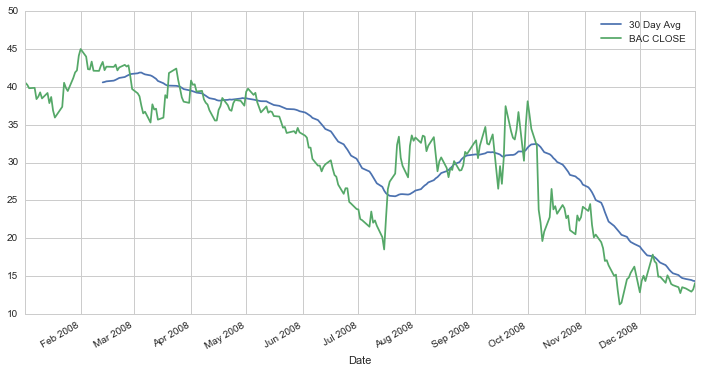

In [141]:
# answer from original notebook

** Create a heatmap of the correlation between the stocks Close Price.**

Text(0.5, 1.0, "Correlation Between Stocks' Close Price")

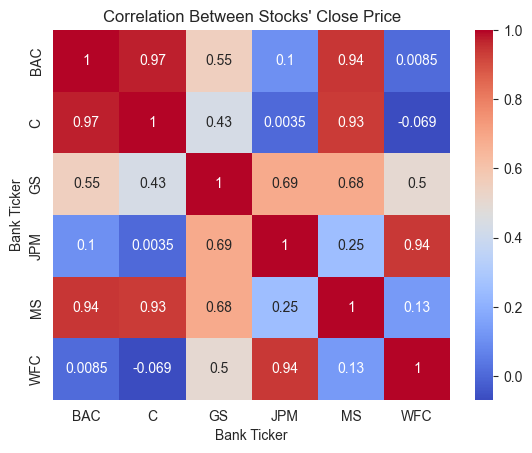

In [31]:
corr = bank_stocks.xs('Close', axis=1, level='Stock Info').corr()

sns.set_style('whitegrid')
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation Between Stocks\' Close Price')

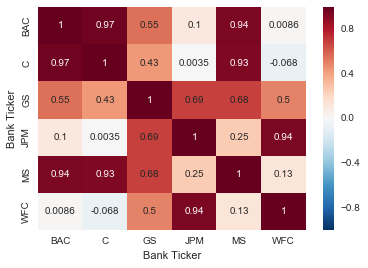

In [41]:
# answer from original notebook

** Optional: Use seaborn's clustermap to cluster the correlations together:**

Text(0.5, 1.0, "Clustermap of Correlation Between Stocks' Close Price")

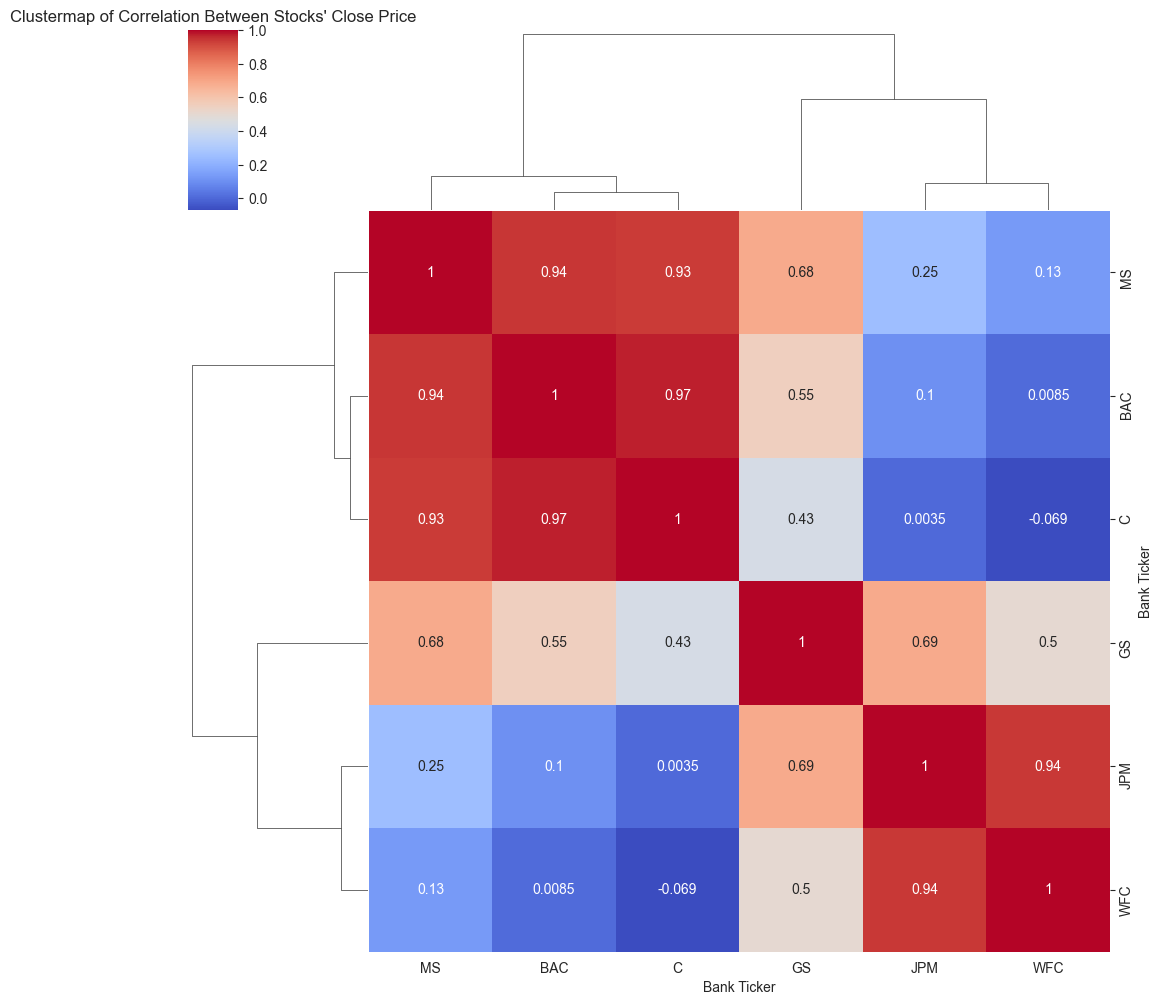

In [32]:
corr = bank_stocks.xs('Close', axis=1, level='Stock Info').corr()

sns.clustermap(corr, annot=True, cmap='coolwarm')

plt.title('Clustermap of Correlation Between Stocks\' Close Price')

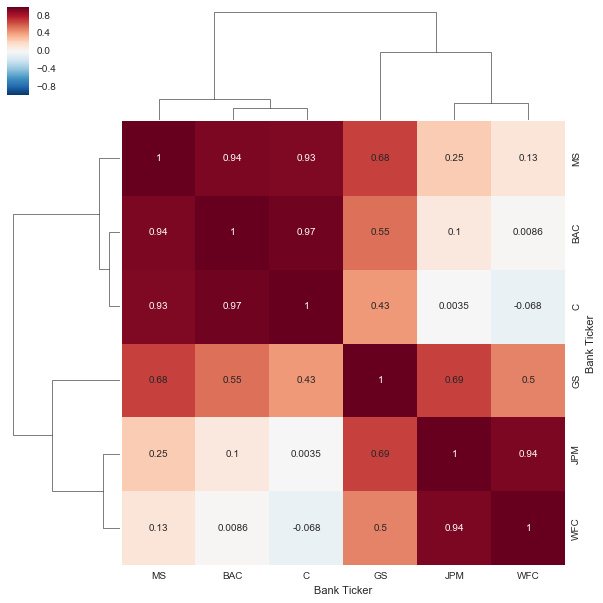

In [26]:
# answer from original notebook

In [21]:
import plotly.express as px
import plotly.figure_factory as ff

corr = bank_stocks.xs('Close', axis=1, level='Stock Info').corr()

fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    colorscale='RdBu',
    annotation_text=corr.round(2).values,
    showscale=True,
)

fig.update_layout(
    title='Clustermap of Correlation Between Stocks\' Close Price',
    xaxis=dict(title='Stocks'),
    yaxis=dict(title='Stocks'),
    height=700,
)

fig.show()

In [42]:
# answer from original notebook

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [33]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

bac = bank_stocks['BAC'].loc['2015-01-01':'2016-01-01']

trace = go.Candlestick(x=bac.index,
                       open=bac['Open'],
                       high=bac['High'],
                       low=bac['Low'],
                       close=bac['Close'])

layout = go.Layout(title='Candlestick Chart for Bank of America Stock (2015)',
                   xaxis={'title': 'Date'},
                   yaxis={'title': 'Price'})

fig = go.Figure(data=[trace], layout=layout)
iplot(fig, show_link=False)

In [125]:
# answer from original notebook

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

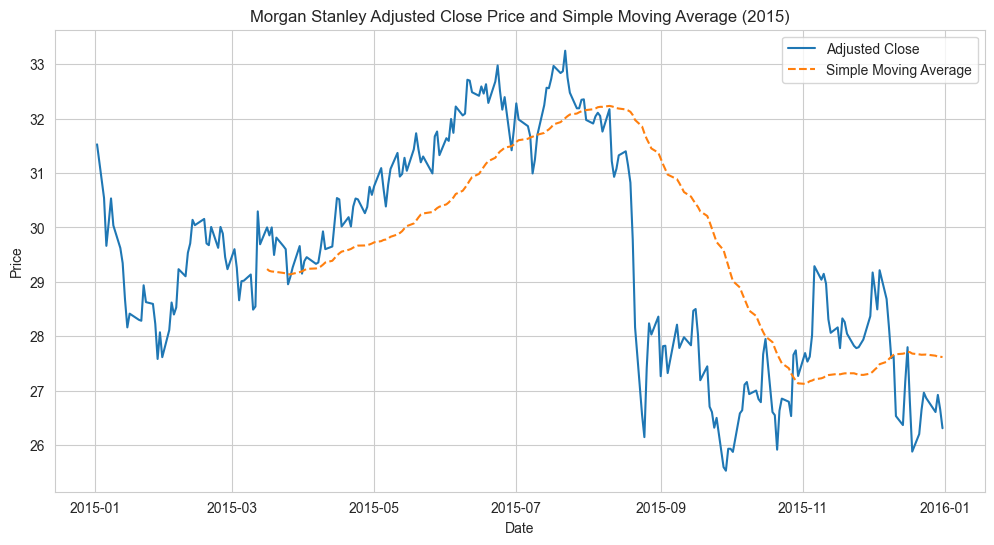

In [34]:
ms_2015 = bank_stocks.loc['2015', ('MS', slice(None))]

ms_2015['SMA'] = ms_2015[('MS', 'Adj Close')].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(ms_2015.index, ms_2015[('MS', 'Adj Close')], label='Adjusted Close')
plt.plot(ms_2015.index, ms_2015['SMA'], label='Simple Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Morgan Stanley Adjusted Close Price and Simple Moving Average (2015)')
plt.legend()

In [38]:
cf.go_offline()

ms_2015 = bank_stocks.loc['2015', ('MS', slice(None))]

ms_2015[('MS', 'SMA_13')] = ms_2015[('MS', 'Adj Close')].rolling(window=13).mean()
ms_2015[('MS', 'SMA_21')] = ms_2015[('MS', 'Adj Close')].rolling(window=21).mean()
ms_2015[('MS', 'SMA_55')] = ms_2015[('MS', 'Adj Close')].rolling(window=55).mean()

ms_2015_sma = ms_2015[[('MS', 'Adj Close'), ('MS', 'SMA_13'), ('MS', 'SMA_21'), ('MS', 'SMA_55')]]
ms_2015_sma.columns = pd.MultiIndex.from_tuples([('MS', 'Adj Close'), ('MS', 'SMA_13'), ('MS', 'SMA_21'), ('MS', 'SMA_55')])

ms_2015_sma.columns = ms_2015_sma.columns.droplevel(0)

ms_2015_sma.iplot(title='Morgan Stanley Adjusted Close Price and Simple Moving Averages (2015)',
                  xTitle='Date', yTitle='Price')

In [126]:
# answer from original notebook

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [39]:
bac_2015 = bank_stocks.loc['2015', ('BAC', slice(None))]

bac_2015[('BAC', 'SMA_20')] = bac_2015[('BAC', 'Adj Close')].rolling(window=20).mean()
bac_2015[('BAC', 'STD_20')] = bac_2015[('BAC', 'Adj Close')].rolling(window=20).std()
bac_2015[('BAC', 'Upper Band')] = bac_2015[('BAC', 'SMA_20')] + (bac_2015[('BAC', 'STD_20')] * 2)
bac_2015[('BAC', 'Lower Band')] = bac_2015[('BAC', 'SMA_20')] - (bac_2015[('BAC', 'STD_20')] * 2)

fig = go.Figure()

fig.add_trace(go.Scatter(x=bac_2015.index, y=bac_2015[('BAC', 'Adj Close')], mode='lines', name='Adjusted Close'))
fig.add_trace(go.Scatter(x=bac_2015.index, y=bac_2015[('BAC', 'SMA_20')], mode='lines', name='20-day SMA'))
fig.add_trace(go.Scatter(x=bac_2015.index, y=bac_2015[('BAC', 'Upper Band')], mode='lines', name='Upper Band'))
fig.add_trace(go.Scatter(x=bac_2015.index, y=bac_2015[('BAC', 'Lower Band')], mode='lines', name='Lower Band'))

fig.update_layout(title='Bank of America Bollinger Bands (2015)',
                  xaxis_title='Date', yaxis_title='Price')

fig.show()

In [135]:
# answer from original notebook

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.